# Emittance measurement along the cycle with and without RF

First of all let's see if the effect remains along the cycle

In [1]:
%run /eos/project/l/liu/Toolbox/myToolbox.py
print '---'
%run /eos/user/e/esenes/PS-analysis-tools/eTools.py
print '---'
sys.path.append('/eos/project/l/liu/Instrumentation/Scripts')
import metaclass

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-693.21.1.el7.x86_64-x86_64-with-redhat-6.10-Carbon
Your folder is /eos/user/e/esenes/Emittance-accuracy-measurement
Your IP is 172.17.0.5
2018-10-18 16:25:57
---
Version 0.1
Use at your own risk. Please report bugs to eugenio.senes@cern.ch
Fork it at https://gitlab.cern.ch/esenes/PS-analysis-tools
---


In [2]:
sys.path.append('/eos/project/l/liu/Instrumentation/Scripts')
import metaclass

# User inputs

In [3]:
folderPath = '/eos/project/l/liu/PS/data/2017/MD2586_InjectionEmittanceBlowup/2018.10.12_bump_BWS85'

matlabVars = ['PR_BWS_85_H_ROT.Acquisition.value.projDataSet1', # Wirescanner 65
                'PR_BWS_85_H_ROT.Acquisition.value.projPositionSet1',
                'PR_BWS_85_H_ROT.Acquisition.value.acqTimeInCycleSet1',
                'PR_BPM.AcquisitionOrbit.value.position', # BPMs
                'PR_BPM.AcquisitionOrbit.value.channelNames',
                'PR_BPM.AcquisitionOrbit.value.measStamp',
                'PR_BCT_ST.Samples.value.samples', 
                'PR_DHZ61.REF_TABLE.value.X', 'PR_DHZ61.REF_TABLE.value.Y',
                'PR_DHZ63.REF_TABLE.value.X', 'PR_DHZ63.REF_TABLE.value.Y',
                'PR_DHZ65.REF_TABLE.value.X', 'PR_DHZ65.REF_TABLE.value.Y',
                'PR_DHZ67.REF_TABLE.value.X', 'PR_DHZ67.REF_TABLE.value.Y',
             ]

In [4]:
# let's start with the matlab data
files1 = sorted(glob.glob(folderPath+'/data/2018*.mat'))
print 'Found ' + str(len(files1)) + ' data files'
myDataFrame = myToolbox.fromMatlabToDataFrame(files1, matlabVars, verbose=False)

Found 46 data files


# Data cleanup

In [5]:
myDataFrame = checkDuplicates(myDataFrame) # Drop double acquisitions from matlab
# myDataFrame = checkBPMData(myDataFrame) # BPMs fault
# manual data drop
# myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-12 23:16:33.100000'].name) # X wirescanner fault
# myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-12 23:32:23.500000'].name) # non-phys emittance
# myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-12 23:31:54.700000'].name)


No duplicates found
---


# Save the imported data

In [6]:
myDataFrame.to_pickle('imported_data_2018.10.12_bump_BWS85.pkl')

# Load some optics data

In [7]:
mc = metaclass.twiss('/eos/user/e/esenes/Emittance-accuracy-measurement/MADx_bumps/ps_6.21_6.24.twiss')

Corrector 61 at 379.3911184 m
Corrector 63 at 391.397489 m
Corrector 65 at 403.4038597 m
Corrector 67 at 416.8102303 m
Displacement difference between the BPM65 and the wirescanner is -9.949666e-07 m


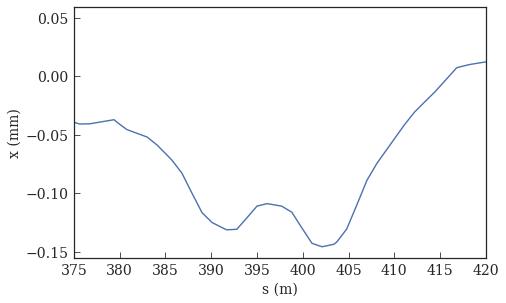

In [8]:
plt.plot(mc.S, 1e3*mc.X)
plt.xlabel('s (m)')
plt.ylabel('x (mm)')
plt.xlim(375,420)

print('Corrector 61 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BHZ61')[0][0]])+' m')
print('Corrector 63 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BHZ63')[0][0]])+' m')
print('Corrector 65 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BHZ65')[0][0]])+' m')
print('Corrector 67 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BHZ67')[0][0]])+' m')


bpmIdx = np.argwhere(np.array(mc.NAME) == 'PR.BPM65')[0][0]
wsIdx = np.argwhere(np.array(mc.NAME) == 'PR.BWSH65')[0][0]
print('Displacement difference between the BPM65 and the wirescanner is '+str(mc.X[bpmIdx]-mc.X[wsIdx]) + ' m')

In [9]:
# other BPMs
print('Corrector 61 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BPM63')[0][0]])+' m')
print('Corrector 63 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BPM64')[0][0]])+' m')
print('Corrector 65 at '+str(mc.S[np.argwhere(np.array(mc.NAME) == 'PR.BPM67')[0][0]])+' m')

bpmIdx = np.argwhere(np.array(mc.NAME) == 'PR.BPM63')[0][0]
wsIdx = np.argwhere(np.array(mc.NAME) == 'PR.BWSH65')[0][0]
print('Displacement difference between the BPM63 and the wirescanner is '+str(mc.X[bpmIdx]-mc.X[wsIdx]) + ' m')
corr63 = mc.X[wsIdx]/mc.X[bpmIdx]

bpmIdx = np.argwhere(np.array(mc.NAME) == 'PR.BPM64')[0][0]
print('Displacement difference between the BPM64 and the wirescanner is '+str(mc.X[bpmIdx]-mc.X[wsIdx]) + ' m')
corr64 = mc.X[wsIdx]/mc.X[bpmIdx]

bpmIdx = np.argwhere(np.array(mc.NAME) == 'PR.BPM67')[0][0]
print('Displacement difference between the BPM67 and the wirescanner is '+str(mc.X[bpmIdx]-mc.X[wsIdx]) + ' m')
corr67 = mc.X[wsIdx]/mc.X[bpmIdx]


Corrector 61 at 390.597489 m
Corrector 63 at 396.5006744 m
Corrector 65 at 415.8102303 m
Displacement difference between the BPM63 and the wirescanner is 1.72168748e-05 m
Displacement difference between the BPM64 and the wirescanner is 3.48464392e-05 m
Displacement difference between the BPM67 and the wirescanner is 0.000142728198809 m


# Calculate wire scanner emittance
## Y plane
### Traditional method

In [10]:
# Wirescanner sigma
#position data cleanup (sort, get unique values and the idxes) and conversion to mm
myDataFrame['BWS65_position'] = myDataFrame['PR_BWS_65_H_ROT.Acquisition.value.projPositionSet1'].apply(lambda x: np.unique(x, return_index=True)[0]*1e-3)
myDataFrame['BWS65_position_idx'] = myDataFrame['PR_BWS_65_H_ROT.Acquisition.value.projPositionSet1'].apply(lambda x: np.unique(x, return_index=True)[1])

#instantiate an array object for the result in the frame
myDataFrame['BWS65_data'] = myDataFrame['BWS65_position_idx'].apply(lambda x: np.empty(len(x)))
pos = np.arange(-50, 50, 0.05)

row, col = myDataFrame.shape

for r in xrange(row):
    myDataFrame['BWS65_data'].iloc[r] = np.interp(pos, myDataFrame['BWS65_position'].iloc[r], myDataFrame['PR_BWS_65_H_ROT.Acquisition.value.projDataSet1'].iloc[r][myDataFrame['BWS65_position_idx'].iloc[r]])  
    
#do the fit and get the sigma in mm
myDataFrame['WS_fit_results_x'] = myDataFrame['BWS65_data'].apply(lambda x: myToolbox.makeGaussianFit_5_parameters(pos,x))
myDataFrame['WS_sigma_x'] = myDataFrame['WS_fit_results_x'].apply(lambda x: x[0][-1])
myDataFrame['WS_centre_x'] = myDataFrame['WS_fit_results_x'].apply(lambda x: x[0][-2])

KeyError: 'PR_BWS_65_H_ROT.Acquisition.value.projPositionSet1'

## Using BPM data instead of the amplitude from YASP


In [ ]:
myDataFrame['Orbit'] = 0.1*myDataFrame['PR_BPM.AcquisitionOrbit.value.position']
myDataFrame['Orbit_timestamp'] = myDataFrame['PR_BPM.AcquisitionOrbit.value.measStamp']

myDataFrame['beam_position'] = myDataFrame['Orbit'].apply(lambda x: np.mean(x[28,325:335]))
myDataFrame['beam_position63'] = myDataFrame['Orbit'].apply(lambda x: np.mean(x[26,325:335])*corr63)
myDataFrame['beam_position64'] = myDataFrame['Orbit'].apply(lambda x: np.mean(x[27,325:335])*corr64)

In [ ]:
fig, ax = plt.subplots(1,figsize=(15,7))

from scipy.optimize import curve_fit
def lin(x, a, b):
    return a + b*x

# BPMs
print('BPMs')
xx = myDataFrame['beam_position']
yy = myDataFrame['WS_centre_x']
ax.plot(xx, yy, 'o',label=('BPM65'))
ax.set_xlabel('BPM bump amplitude reported to BWS65 (mm)')
ax.set_ylabel('WS fit centre (mm)')
popt, pcov = curve_fit(lin, xx, yy )
print(popt, np.sqrt(np.diag(pcov)))
ax.plot(xx, lin(xx, *popt),label='fit: slope='+str(popt[-1]))
#---
xx = myDataFrame['beam_position63']
yy = myDataFrame['WS_centre_x']
ax.plot(xx, yy, 'o',label=('BPM63 corrected'))
popt, pcov = curve_fit(lin, xx, yy )
print(popt, np.sqrt(np.diag(pcov)))
ax.plot(xx, lin(xx, *popt),label='fit: slope='+str(popt[-1]))
#---
xx = myDataFrame['beam_position64']
yy = myDataFrame['WS_centre_x']
ax.plot(xx, yy, 'o',label=('BPM64 corrected'))
popt, pcov = curve_fit(lin, xx, yy )
print(popt, np.sqrt(np.diag(pcov)))
ax.plot(xx, lin(xx, *popt),label='fit: slope='+str(popt[-1]))

ax.legend(frameon=True)

fig.tight_layout()

In [ ]:
xx = myDataFrame['beam_position'][29]
yy = myDataFrame['WS_centre_x'][29]

plt.plot(xx,yy,'o')

In [ ]:
plt.plot(xx,'o')

In [ ]:
myDataFrame.index[29]